<a href="https://colab.research.google.com/github/ravi-kr/pytorch-practice/blob/master/2_ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
import numpy as np
df['Outcome'] = np.where(df['Outcome']==1, "Diabetic", "Non Diabetic")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


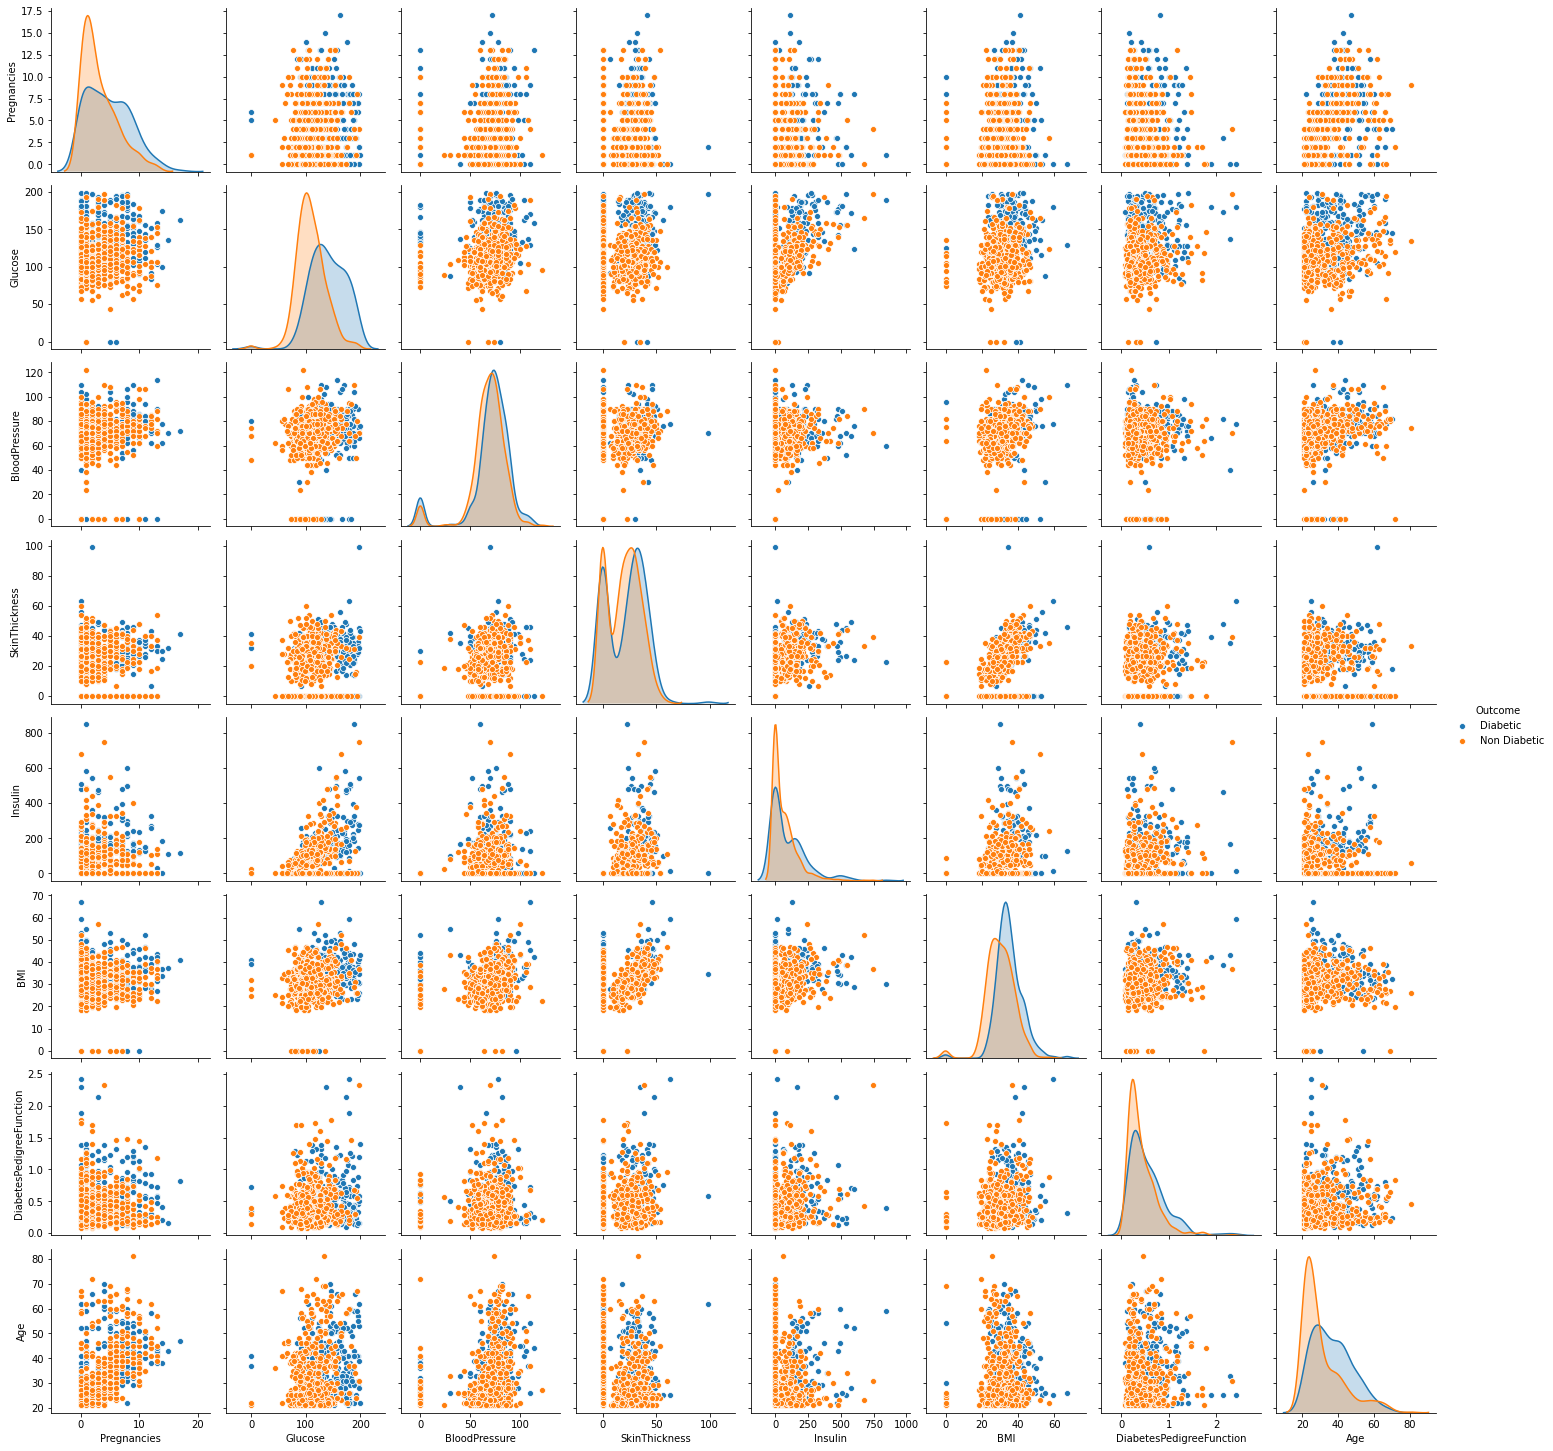

In [6]:
sns.pairplot(df, hue = "Outcome")

In [67]:
df = pd.read_csv('diabetes.csv')

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [72]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
y_train = torch.tensor(y_train, dtype=torch.long)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [73]:
df.shape

(768, 9)

In [74]:
class ANN_Model(nn.Module):
  def __init__(self, input_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x

In [75]:
torch.manual_seed(20)
model = ANN_Model()

In [76]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [77]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [78]:
y_pred = model.forward(X_train)

In [79]:
type(y_pred)

torch.Tensor

In [80]:
epochs = 500
final_losses = []
for i in range(epochs):
  i = i + 1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, y_train)
  final_losses.append(loss)
  if i%10 == 1:
    print("Epoch number: {} and the loss : {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019213080406189
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529038906097412
Epoch number: 61 and the loss : 0.5410095453262329
Epoch number: 71 and the loss : 0.5310391187667847
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970115661621
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.4983409643173218
Epoch number: 121 and the loss : 0.4960549771785736
Epoch number: 131 and the loss : 0.4828638434410095
Epoch number: 141 and the loss : 0.4756038784980774
Epoch number: 151 and the loss : 0.4833468496799469
Epoch number: 161 and the loss : 0.4882737398147583
Epoch number: 171 and the loss : 0.46933555603027344
Epoch number: 181 and the loss : 0.46626192331314087
Epoch number: 191 and t

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

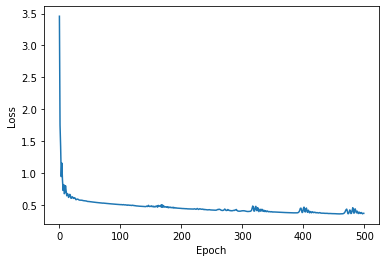

In [82]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [93]:
predictions = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    print(y_pred.argmax().item())
    predictions.append(float(y_pred.argmax().item()))
    

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [94]:
y_test

tensor([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [95]:
predictions

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[92, 15],
       [16, 31]])

Text(69.0, 0.5, 'Predicted Values')

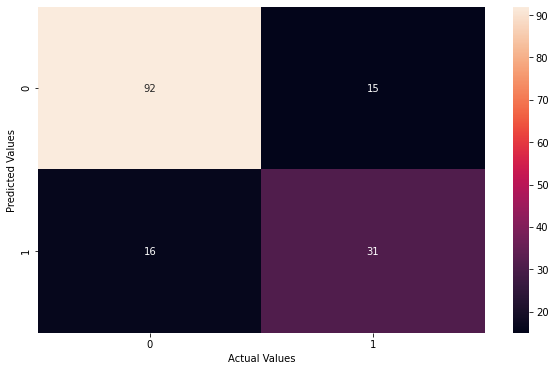

In [97]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [98]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7987012987012987

In [99]:
torch.save(model, 'diabetes.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [100]:
model = torch.load('diabetes.pt')

In [101]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [102]:
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [103]:
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [104]:
new_data = torch.tensor(lst1)

In [110]:
with torch.no_grad():
  print(model(new_data))

tensor([1.5015, 0.9838])
